# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [19]:
harry_potter_df = movies[movies['title'].str.contains("Harry Potter", case=False)].sort_values(ascending=False,by='year')
harry_potter_df

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [20]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [21]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [35]:
print("The No of movies made in between 2000 and 2018 is: " ,len(movies[(movies.year >=2000) & (movies.year <= 2018)]))

The No of movies made in between 2000 and 2018 is:  114070


### Section I - Q4: How many movies are titled "Hamlet"?

In [41]:
# movies[movies.title.str.contains('Hamlet', case=False)] # If intention is to find movie titles containing name 'Hamlet'
len(movies[movies.title.str.lower() == 'hamlet'])   # Assuming the question is to find movies with exact title of 'Hamlet'


20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [46]:
movies[movies.title.str.lower() == 'hamlet']  # Assuming the question is to find movies with exact title of 'Hamlet'

,title,year
1931,Hamlet,2009
8214,Hamlet,1976
46344,Hamlet,1921
55639,Hamlet,2000
73869,Hamlet,1948
98326,Hamlet,1990
118535,Hamlet,1913
124506,Hamlet,1911
140203,Hamlet,1954
155004,Hamlet,1964


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [13]:
import numpy as np
supporting_chars = len(cast[(cast.title == "Inception") & cast.n.isna()])
print("No of Supporting character in 'Inception' movie: ", supporting_chars)

No of Supporting character in 'Inception' movie:  27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
main_cast = len(cast[(cast.title == "Inception")]) - len(cast[(cast.title == "Inception") & (cast.n.isna())])
print("No of main cast in 'Inception' movie: ", main_cast)

No of main cast in 'Inception' movie:  51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [31]:
cast[cast.title == 'Inception'].sort_values(by='n').head(10).name

590576        Leonardo DiCaprio
859993     Joseph Gordon-Levitt
3387147              Ellen Page
940923                Tom Hardy
2406531            Ken Watanabe
1876301              Dileep Rao
1615709          Cillian Murphy
183937             Tom Berenger
2765969        Marion Cotillard
1826027      Pete Postlethwaite
Name: name, dtype: object

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [42]:
cast[cast.character.str.contains('Albus Dumbledore', case=False)].title.unique()

array(['Epic Movie', 'Harry Potter and the Deathly Hallows: Part 1',
       'Harry Potter and the Deathly Hallows: Part 2',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       'Harry Potter and the Chamber of Secrets',
       "Harry Potter and the Sorcerer's Stone", 'Ultimate Hero Project',
       'Potter'], dtype=object)

In [44]:
cast[cast.character.str.contains('Albus Dumbledore', case=False)].name.unique()

array(['Dane Farwell', 'Michael Gambon', 'Richard Harris',
       "George (X) O'Connor", 'Toby Regbo', 'Timothy Tedmanson'],
      dtype=object)

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [47]:
len(cast[cast.name=='Keanu Reeves'].character.unique())

56

In [67]:
cast[(cast.name=='Keanu Reeves') & (cast.n == 1.0) & (cast.year >=1999)]['character'] # assuming Lead roles means n=1.0

1892342                     Kai
1892348        John Constantine
1892358           Conor O'Neill
1892359             Henry Torne
1892361               John Wick
1892362               John Wick
1892366                    Evan
1892378              Lucas Hill
1892382    Detective Tom Ludlow
1892383             Nelson Moss
1892385                  Klaatu
1892388              Alex Wyler
1892390                     Neo
1892397             Shane Falco
1892399                  Ramsey
Name: character, dtype: object

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [75]:
len(cast[(cast.year >= 1950) & (cast.year <= 1960)]['character'].unique()) #assuming roles means characters

139020

In [76]:
len(cast[(cast.year >= 2007) & (cast.year <= 2017)]['character'].unique()) #assuming roles means characters

619945

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [80]:
len(cast[(cast.year >=2000) & (cast.n == 1.0)])   # assuming leading role means n=1.0

60568

In [104]:
len(cast[(cast.year >=2000) & (cast.n != 1.0)]) - len(cast[(cast.year >=2000) & (cast.n.isna())])

1001710

In [103]:
len(cast[(cast.year >=2000) & (cast.n.isna())])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [9]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

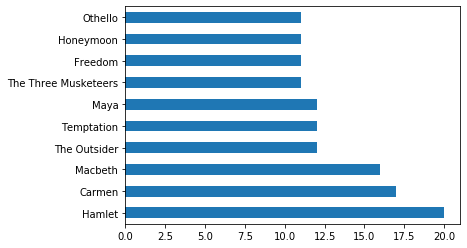

In [10]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [11]:
movies_2000s = movies[movies.year >= 2000]
movies_2000s.year.value_counts().head(3)

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

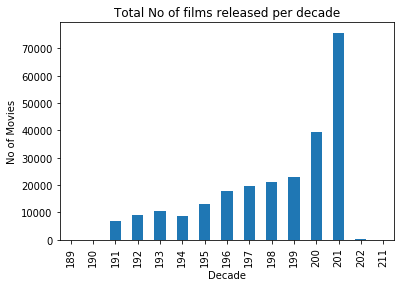

In [40]:
movies_decade = movies
movies_decade['Decade'] = movies_decade['year'] // 10
plot = movies_decade.Decade.value_counts().sort_index().plot(kind='bar')

plot.set_xlabel('Decade')
plot.set_ylabel('No of Movies')
plot.set_title('Total No of films released per decade');

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [13]:
cast.groupby('character').count().title.sort_values(ascending=False).head(10)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: title, dtype: int64

In [19]:
cast[cast.character == 'Herself'].groupby('name').count().title.sort_values(ascending=False).head(10)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
Name: title, dtype: int64

In [20]:
cast[cast.character == 'Himself'].groupby('name').count().title.sort_values(ascending=False).head(10)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: title, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [22]:
cast[cast.character.str.startswith('Zombie')].groupby('character').count().title.sort_values(ascending=False).head(10)

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: title, dtype: int64

In [26]:
cast[cast.character.str.startswith('Police')].groupby('character').count().title.sort_values(ascending=False).head(10)

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: title, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

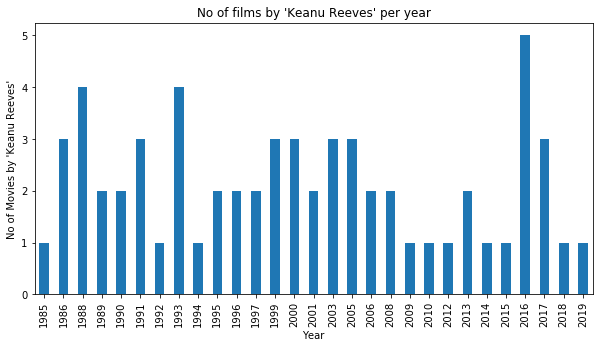

In [35]:
plot = cast[cast.name=='Keanu Reeves'].groupby('year').count().title.sort_index().plot(kind='bar', figsize=(10,5))
plot.set_xlabel('Year')
plot.set_ylabel("No of Movies by 'Keanu Reeves'")
plot.set_title("No of films by 'Keanu Reeves' per year");

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


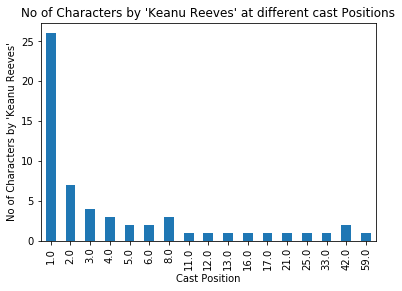

In [39]:
plot = cast[cast.name == 'Keanu Reeves'].groupby('n').count().title.sort_index().plot(kind='bar')
plot.set_xlabel('Cast Position')
plot.set_ylabel("No of Characters by 'Keanu Reeves'")
plot.set_title("No of Characters by 'Keanu Reeves' at different cast Positions");

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

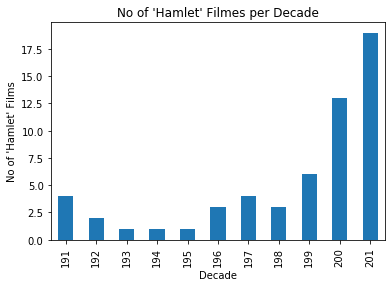

In [44]:
plot = movies_decade[movies_decade.title.str.contains("Hamlet", case=False)].groupby('Decade').count().title.sort_index().plot(kind='bar')
plot.set_xlabel('Decade')
plot.set_ylabel("No of 'Hamlet' Films")
plot.set_title("No of 'Hamlet' Filmes per Decade");

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [48]:
len(cast[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n==1.0)])

11823

In [49]:
len(cast[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n==1.0)])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

> **Ask Mentor, Couldnt understand this**

In [60]:
# frank_roles = cast[cast.name == 'Frank Oz'].groupby('title').count()
# frank_multiple_roles

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [67]:
frank_characters = cast[(cast.name == 'Frank Oz')].groupby('character').count()
frank_characters[frank_characters['name'] > 1].index

Index(['Animal', 'Bert', 'Cookie Monster', 'Fozzie Bear', 'Grover',
       'Miss Piggy', 'Sam the Eagle', 'Yoda'],
      dtype='object', name='character')

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

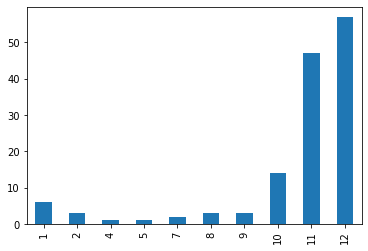

In [68]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

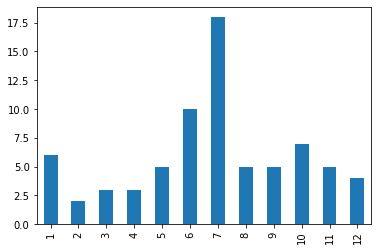

In [78]:
summer = release_dates[(release_dates.title.str.contains("Summer", case=False)) & (release_dates.country =='USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar');

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

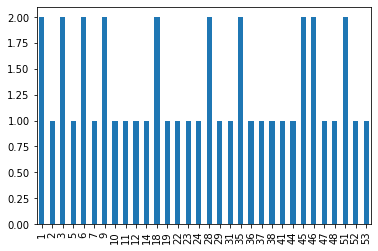

In [79]:
action = release_dates[(release_dates.title.str.contains("Action", case=False)) & (release_dates.country =='USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar');

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [105]:
keanu_lead = cast[(cast.name == 'Keanu Reeves') & (cast.n == 1.0)]
release_dates[(release_dates.title.isin(keanu_lead.title.unique())) & (release_dates.country == 'USA')][['date', 'title']].sort_values(by='date')

,date,title
340785,1922-10-22,Speed
340787,1936-05-08,Speed
352248,1968-02-08,Sweet November
406424,1988-04-15,The Night Before
46177,1989-02-17,Bill & Ted's Excellent Adventure
46168,1991-07-19,Bill & Ted's Bogus Journey
223169,1994-05-25,Little Buddha
340790,1994-06-10,Speed
184929,1995-05-26,Johnny Mnemonic
11608,1995-08-11,A Walk in the Clouds


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

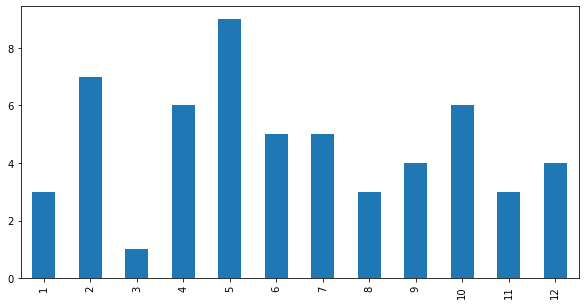

In [120]:
keanu = cast[cast.name == 'Keanu Reeves']
keanu_USA = release_dates[(release_dates.title.isin(keanu.title.unique())) & (release_dates.country == 'USA')]
keanu_USA.date.dt.month.value_counts().sort_index().plot(kind='bar', figsize=(10,5));

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

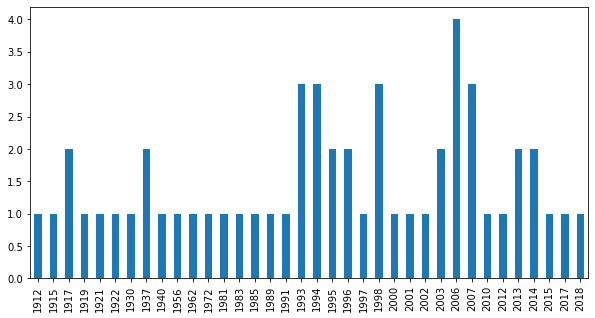

In [119]:
ian = cast[cast.name == 'Ian McKellen']
ian_USA = release_dates[(release_dates.title.isin(ian.title.unique())) & (release_dates.country == 'USA')]
ian_USA.date.dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10,5));